In [1]:
import warnings
warnings.filterwarnings("ignore")

conda create -n myenv python=3.11.14

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
og_df = pd.read_csv(r"C:\Users\Red\Desktop\mlops\bank_fraud_realtime\input\Base.csv")

og_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [10]:
og_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [11]:
fraud_df = og_df[og_df['fraud_bool'] == 1]
fraud_df['month'].value_counts()

month
0    1500
4    1452
6    1450
7    1428
5    1411
3    1392
2    1198
1    1198
Name: count, dtype: int64

In [12]:
df = og_df[og_df['month']<=5]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794989 entries, 0 to 794988
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        794989 non-null  int64  
 1   income                            794989 non-null  float64
 2   name_email_similarity             794989 non-null  float64
 3   prev_address_months_count         794989 non-null  int64  
 4   current_address_months_count      794989 non-null  int64  
 5   customer_age                      794989 non-null  int64  
 6   days_since_request                794989 non-null  float64
 7   intended_balcon_amount            794989 non-null  float64
 8   payment_type                      794989 non-null  object 
 9   zip_count_4w                      794989 non-null  int64  
 10  velocity_6h                       794989 non-null  float64
 11  velocity_24h                      794989 non-null  float6

In [14]:
df.isnull().sum().sort_values(ascending=False).head(10)

fraud_bool                      0
income                          0
name_email_similarity           0
prev_address_months_count       0
current_address_months_count    0
customer_age                    0
days_since_request              0
intended_balcon_amount          0
payment_type                    0
zip_count_4w                    0
dtype: int64

In [15]:
df[['fraud_bool']].value_counts(normalize = True)*100.0

fraud_bool
0             98.974703
1              1.025297
Name: proportion, dtype: float64

In [16]:
df['fraud_bool'].min()

np.int64(0)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,794989.0,0.010253,0.100737,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,794989.0,0.547354,0.291721,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,794989.0,0.498986,0.290853,1.434550e-06,0.227854,0.499747,0.763261,0.999999
prev_address_months_count,794989.0,16.324654,43.804765,-1.000000e+00,-1.000000,-1.000000,12.000000,377.000000
current_address_months_count,794989.0,88.104741,89.890580,-1.000000e+00,20.000000,53.000000,132.000000,425.000000
customer_age,794989.0,33.664856,12.091648,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,794989.0,1.065465,5.377536,4.036860e-09,0.007236,0.015307,0.026708,76.581477
intended_balcon_amount,794989.0,8.908110,20.431613,-1.553055e+01,-1.172497,-0.818856,7.644076,112.956928
zip_count_4w,794989.0,1681.876708,1036.619279,1.000000e+00,966.000000,1361.000000,2097.000000,6700.000000
velocity_6h,794989.0,6148.453005,3013.664048,-1.304569e+02,3971.401783,5961.190608,8113.534146,16715.565404


In [18]:
import numpy as np

cols_with_neg1 = [
    'prev_address_months_count',
    'current_address_months_count',
    'bank_months_count',
    'intended_balcon_amount',
    'credit_risk_score',
    'session_length_in_minutes',
    'device_distinct_emails_8w'
]

for col in cols_with_neg1:
    df[col] = df[col].replace(-1, np.nan)
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

(df.isna().sum()/len(df)*100).sort_values(ascending=False).head(10)


intended_balcon_amount          73.700139
prev_address_months_count       71.500738
bank_months_count               25.100850
credit_risk_score                1.689960
current_address_months_count     0.380760
session_length_in_minutes        0.190317
device_distinct_emails_8w        0.038868
fraud_bool                       0.000000
payment_type                     0.000000
zip_count_4w                     0.000000
dtype: float64

Holyy smoking pot 70+ values missing.uselss dustbin. LEts check them out

In [19]:
cols_with_missing = [
    'intended_balcon_amount',
    'prev_address_months_count',
    'bank_months_count',
    'credit_risk_score',
    'current_address_months_count',
    'session_length_in_minutes',
    'device_distinct_emails_8w'
]

for col in cols_with_missing:
    missing_df = df[df[col].isna()]
    total_missing = len(missing_df)
    fraud_missing = missing_df['fraud_bool'].sum()
    nonfraud_missing = total_missing - fraud_missing
    fraud_ratio = round(100 * fraud_missing / total_missing, 3) if total_missing > 0 else 0
    
    print(f"{col:30} → Missing: {total_missing:8} | Fraud: {fraud_missing:6} | Non-Fraud: {nonfraud_missing:8} | Fraud %: {fraud_ratio}")


intended_balcon_amount         → Missing:   585908 | Fraud:   7160 | Non-Fraud:   578748 | Fraud %: 1.222
prev_address_months_count      → Missing:   568423 | Fraud:   7517 | Non-Fraud:   560906 | Fraud %: 1.322
bank_months_count              → Missing:   199549 | Fraud:   3064 | Non-Fraud:   196485 | Fraud %: 1.535
credit_risk_score              → Missing:    13435 | Fraud:     47 | Non-Fraud:    13388 | Fraud %: 0.35
current_address_months_count   → Missing:     3027 | Fraud:      9 | Non-Fraud:     3018 | Fraud %: 0.297
session_length_in_minutes      → Missing:     1513 | Fraud:     13 | Non-Fraud:     1500 | Fraud %: 0.859
device_distinct_emails_8w      → Missing:      309 | Fraud:      3 | Non-Fraud:      306 | Fraud %: 0.971


lets remove top 3 most missing features 

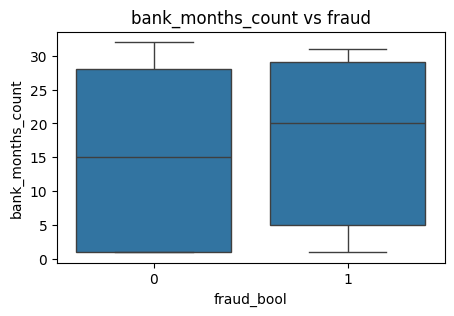

In [20]:
plt.figure(figsize=(5,3))
sns.boxplot(x='fraud_bool',y='bank_months_count',data=df,showfliers = False)
plt.title("bank_months_count vs fraud")
plt.show()

In [21]:
cols_to_drop = [
    'intended_balcon_amount',
    'prev_address_months_count',
    'bank_months_count'
]

df_clean = df.drop(columns=cols_to_drop)
print("Remaining columns:", len(df_clean.columns))


Remaining columns: 29


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794989 entries, 0 to 794988
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        794989 non-null  int64  
 1   income                            794989 non-null  float64
 2   name_email_similarity             794989 non-null  float64
 3   current_address_months_count      791962 non-null  float64
 4   customer_age                      794989 non-null  int64  
 5   days_since_request                794989 non-null  float64
 6   payment_type                      794989 non-null  object 
 7   zip_count_4w                      794989 non-null  int64  
 8   velocity_6h                       794989 non-null  float64
 9   velocity_24h                      794989 non-null  float64
 10  velocity_4w                       794989 non-null  float64
 11  bank_branch_count_8w              794989 non-null  int64 

In [23]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("Numeric columns:", len(numeric_cols))
print(numeric_cols.tolist())
print("\nCategorical columns:", len(categorical_cols))
print(categorical_cols.tolist())


Numeric columns: 24
['fraud_bool', 'income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']

Categorical columns: 5
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [24]:
df_clean['email_is_free'].unique()

array([1, 0])

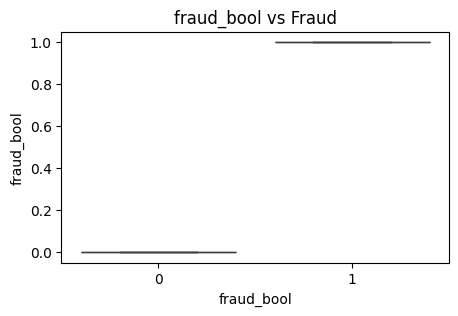

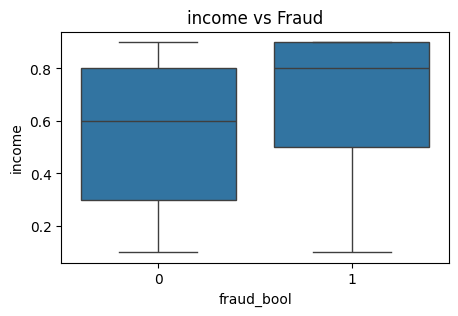

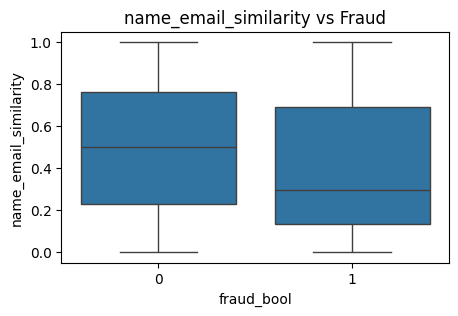

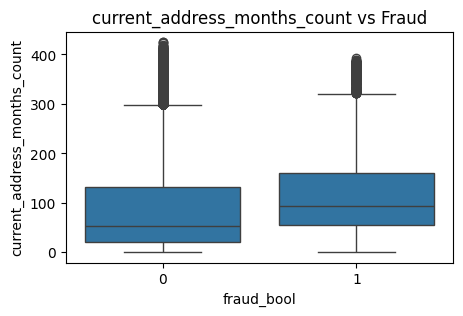

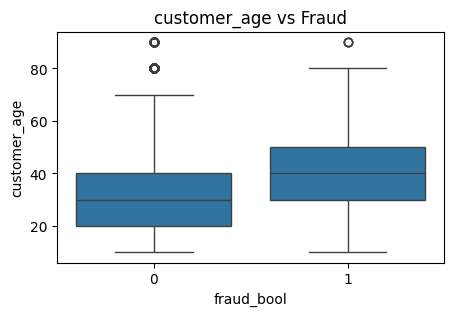

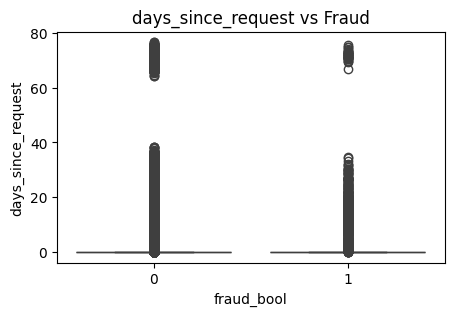

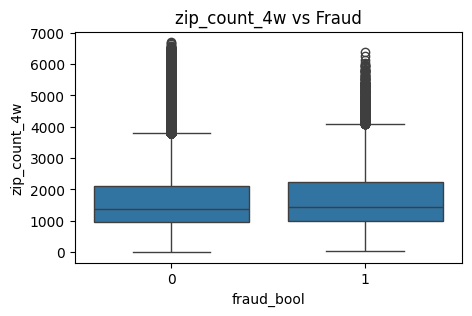

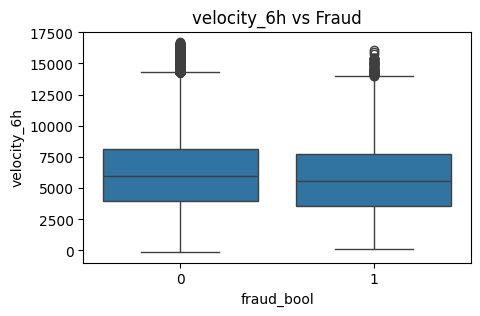

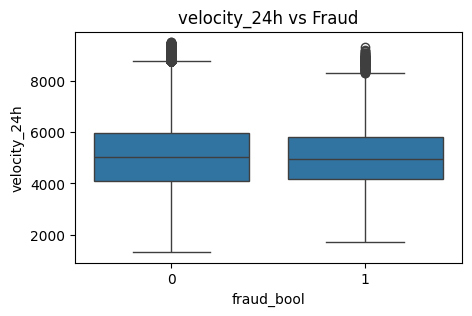

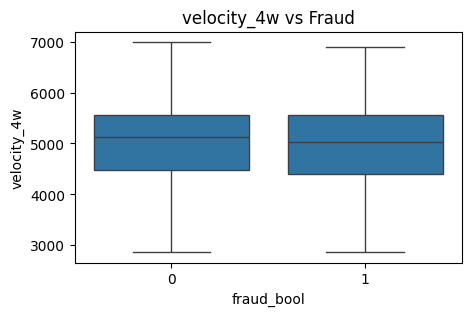

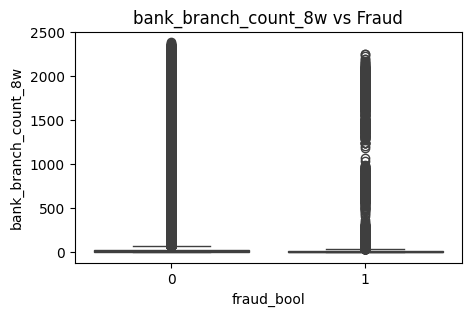

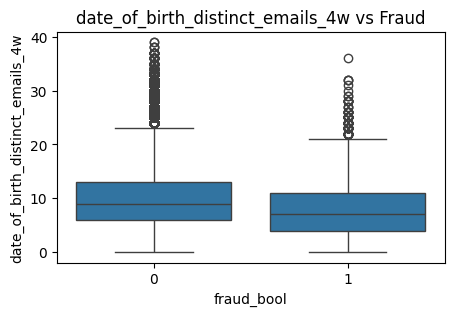

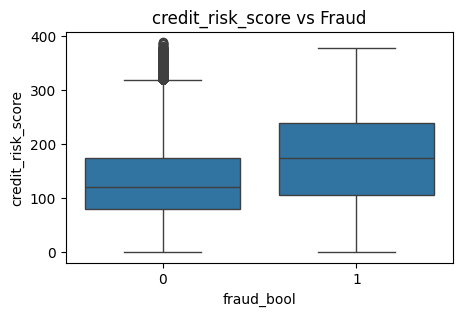

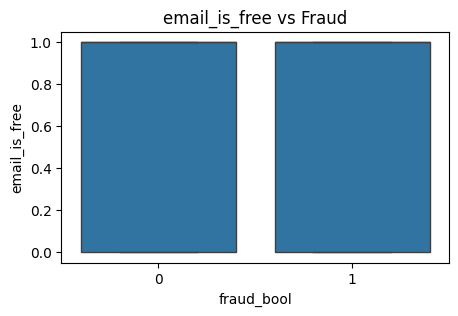

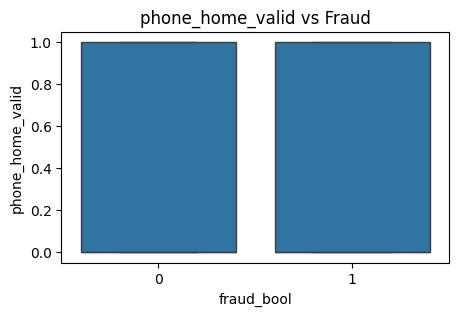

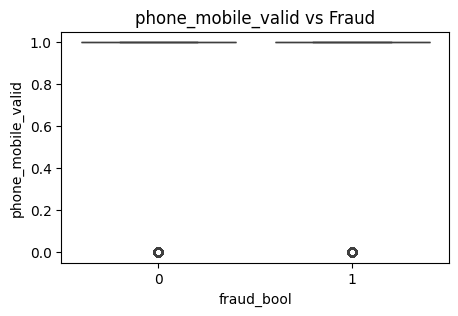

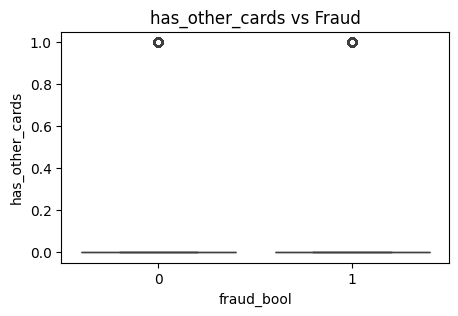

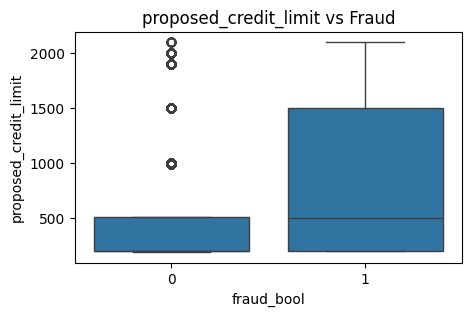

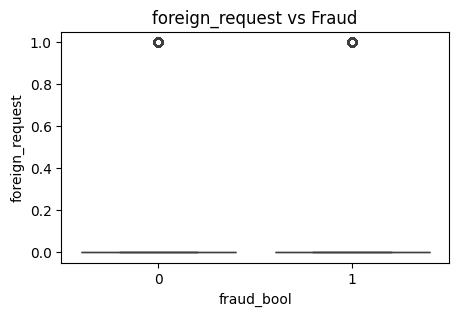

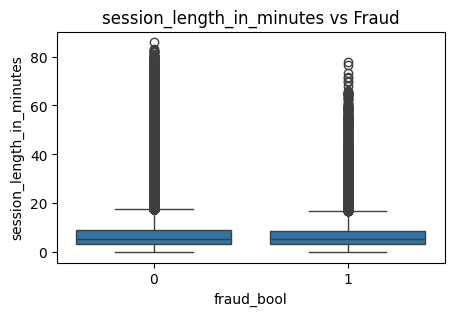

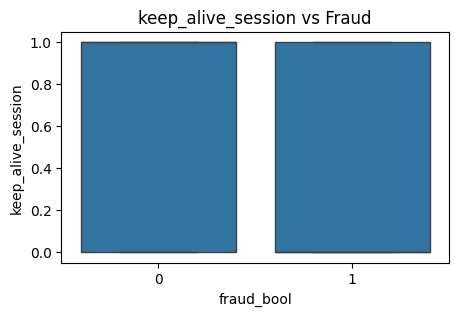

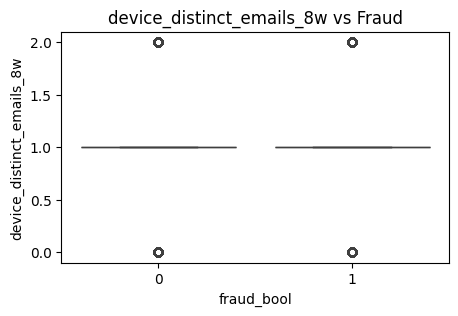

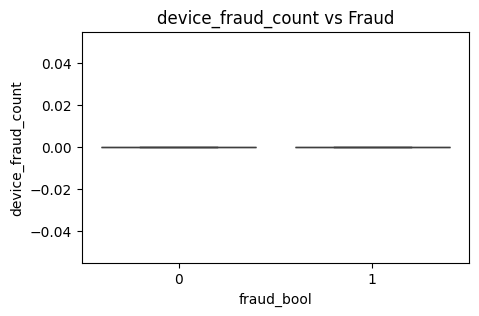

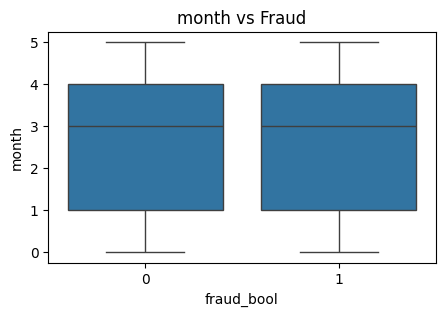

In [25]:
# Plot numeric features against fraud_bool
num_cols = numeric_cols
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='fraud_bool', y=col, data=df)
    plt.title(f"{col} vs Fraud")
    plt.show()

In [45]:
num = ['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'proposed_credit_limit']
cat = ['email_is_free', 'phone_home_valid','phone_mobile_valid', 'has_other_cards','foreign_request','keep_alive_session','payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [46]:
for col in cat:
    temp = df_clean.groupby(col)['fraud_bool'].mean().sort_values(ascending=False)
    print(f"\nFraud rate by {col}:\n", temp)



Fraud rate by email_is_free:
 email_is_free
1    0.012687
0    0.007373
Name: fraud_bool, dtype: float64

Fraud rate by phone_home_valid:
 phone_home_valid
0    0.012903
1    0.006357
Name: fraud_bool, dtype: float64

Fraud rate by phone_mobile_valid:
 phone_mobile_valid
0    0.014455
1    0.009708
Name: fraud_bool, dtype: float64

Fraud rate by has_other_cards:
 has_other_cards
0    0.012046
1    0.004050
Name: fraud_bool, dtype: float64

Fraud rate by foreign_request:
 foreign_request
1    0.020036
0    0.009992
Name: fraud_bool, dtype: float64

Fraud rate by keep_alive_session:
 keep_alive_session
0    0.015824
1    0.006034
Name: fraud_bool, dtype: float64

Fraud rate by payment_type:
 payment_type
AC    0.015782
AB    0.010396
AD    0.009812
AA    0.005016
AE    0.004032
Name: fraud_bool, dtype: float64

Fraud rate by employment_status:
 employment_status
CC    0.023362
CG    0.013441
CA    0.011348
CB    0.006384
CD    0.003954
CE    0.002094
CF    0.001877
Name: fraud_bool, dty

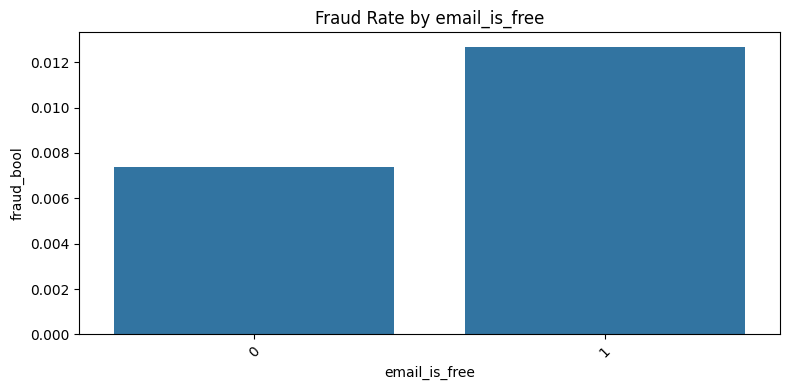

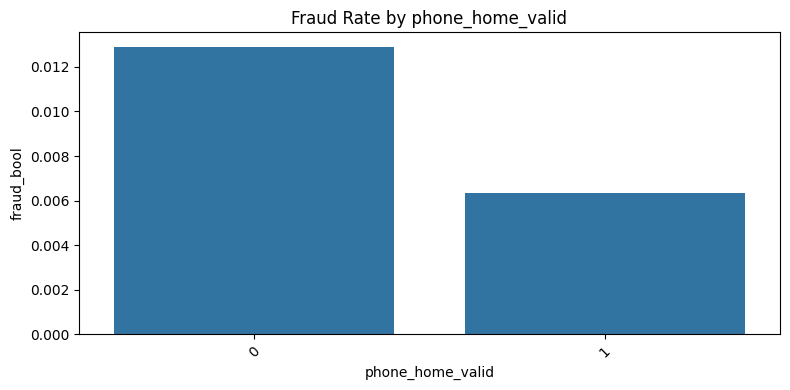

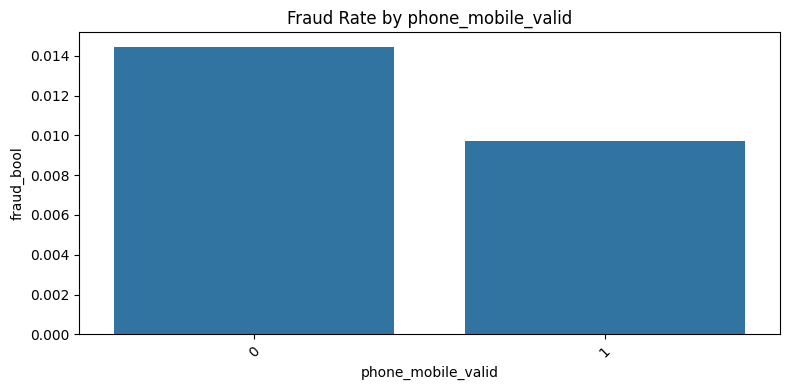

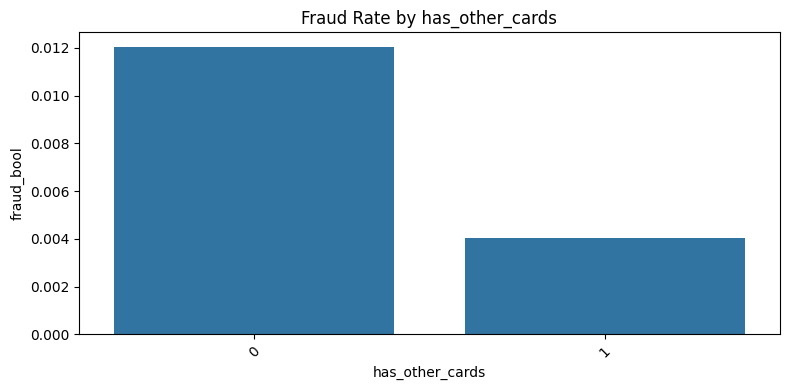

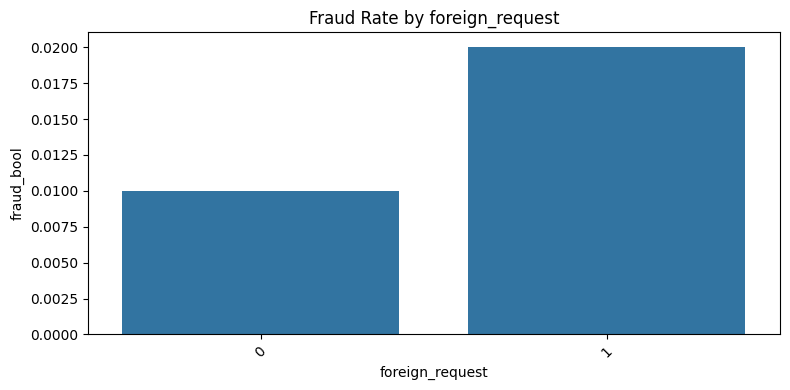

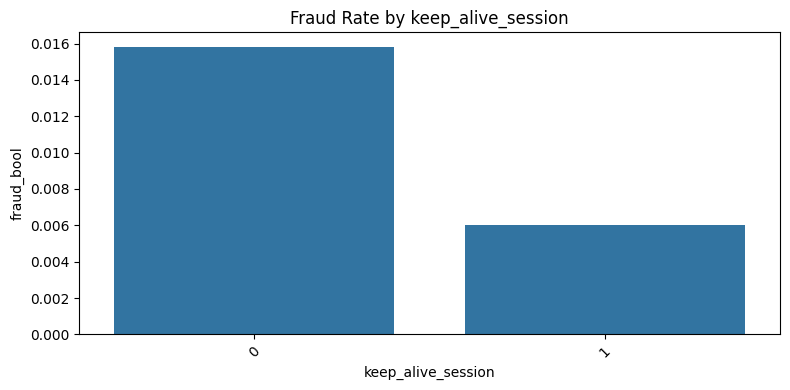

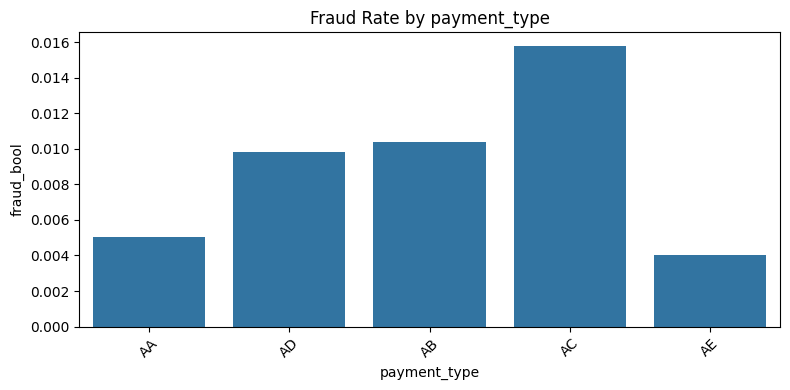

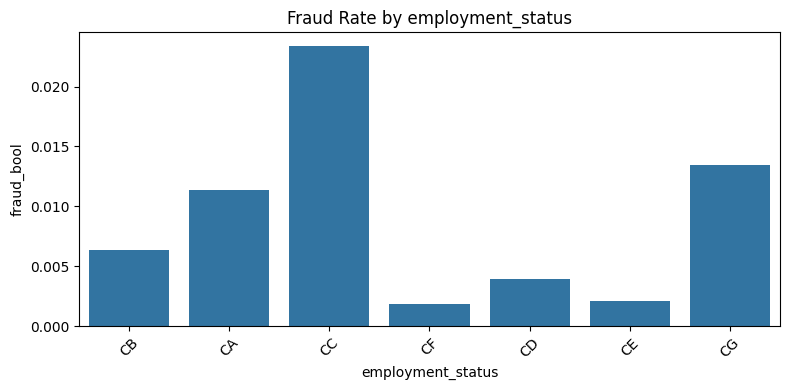

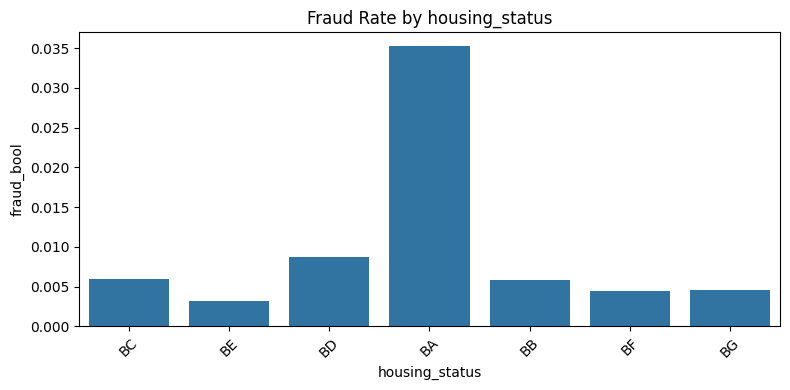

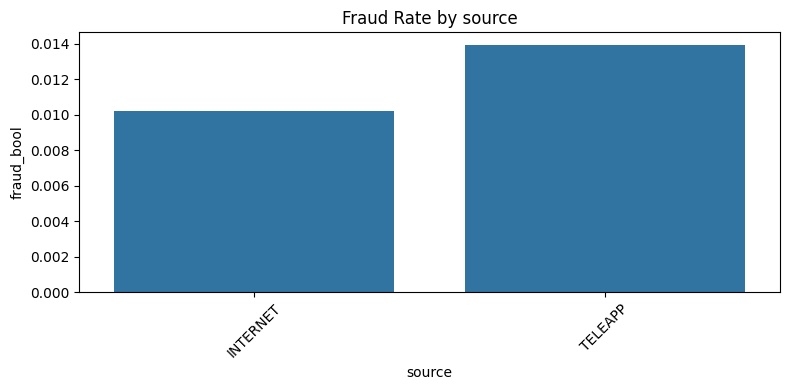

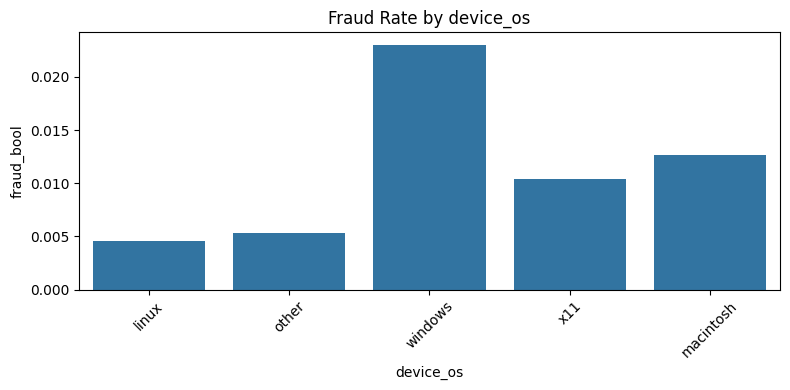

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt

for col in cat:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y='fraud_bool', data=df_clean, estimator='mean', errorbar=None)
    plt.title(f"Fraud Rate by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


I think we can keep this features since i can see significant diff in each of them in frad rate but lets see some nums. ill do chi square test why::: 

You ran the chi-square test for categorical features vs. your target fraud_bool.
The test checks independence between the two.

Null hypothesis (H₀): variable and target are independent (no relationship).

Alternative (H₁): they’re dependent (related).

Since all p-values are ≈ 0.00000 (< 0.05), we can reject the null hypothesis across the board.

https://chatgpt.com/c/690a439a-7ed0-8321-976c-657f6a00b80d

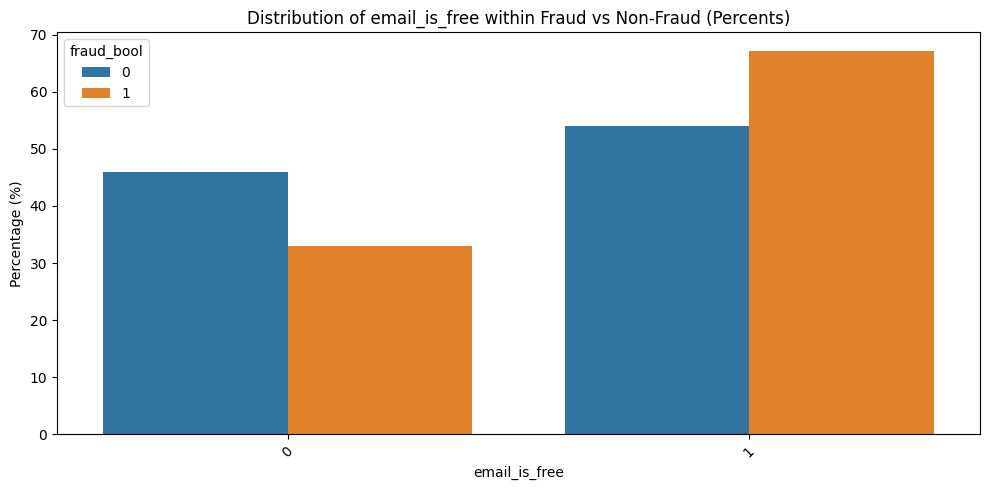

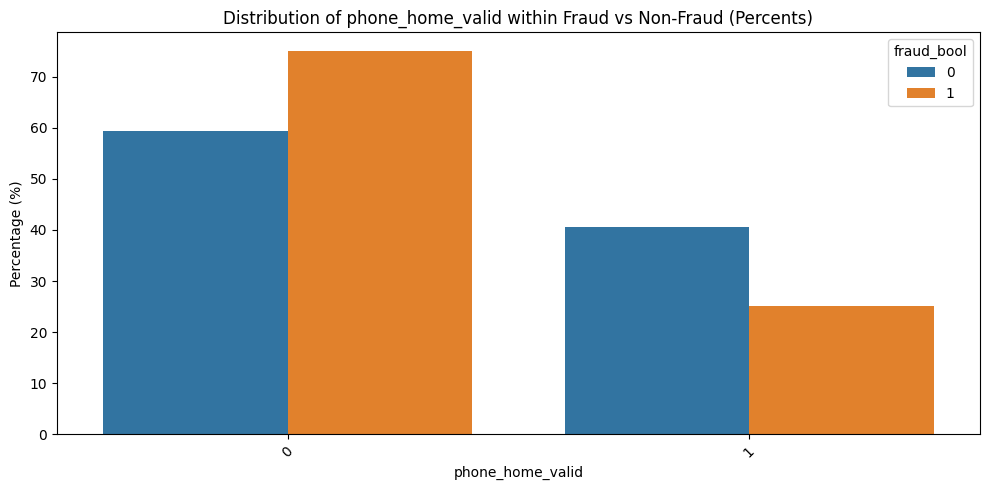

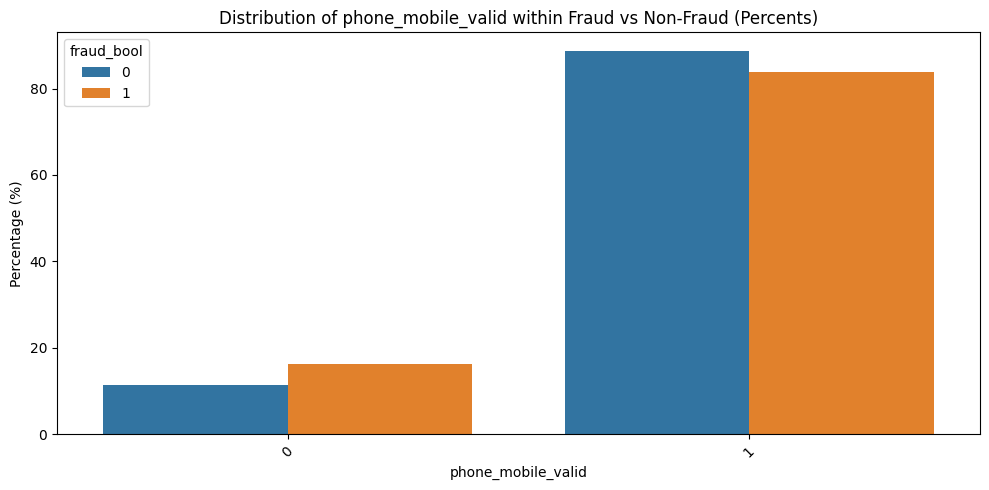

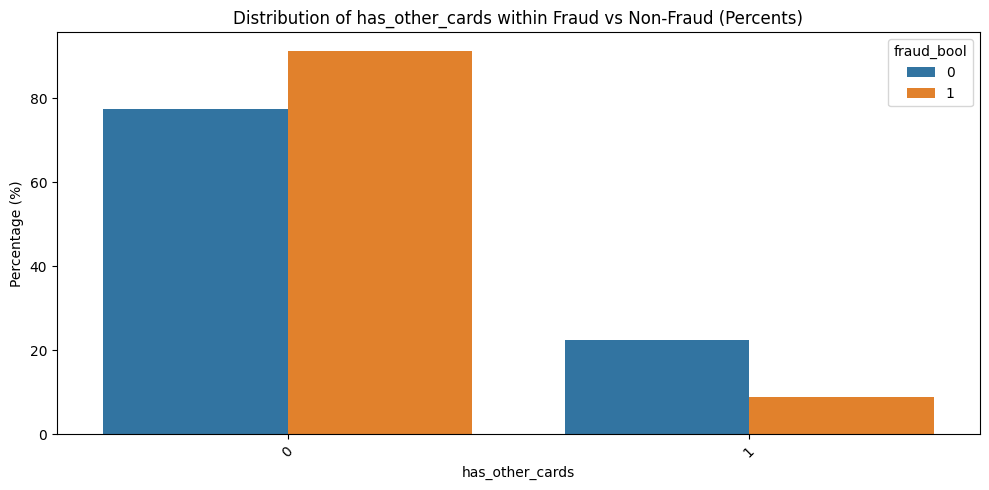

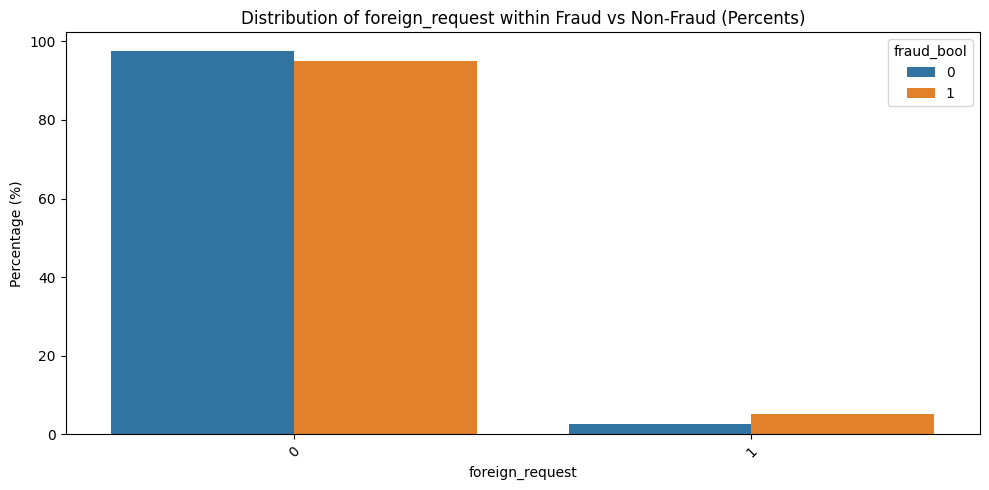

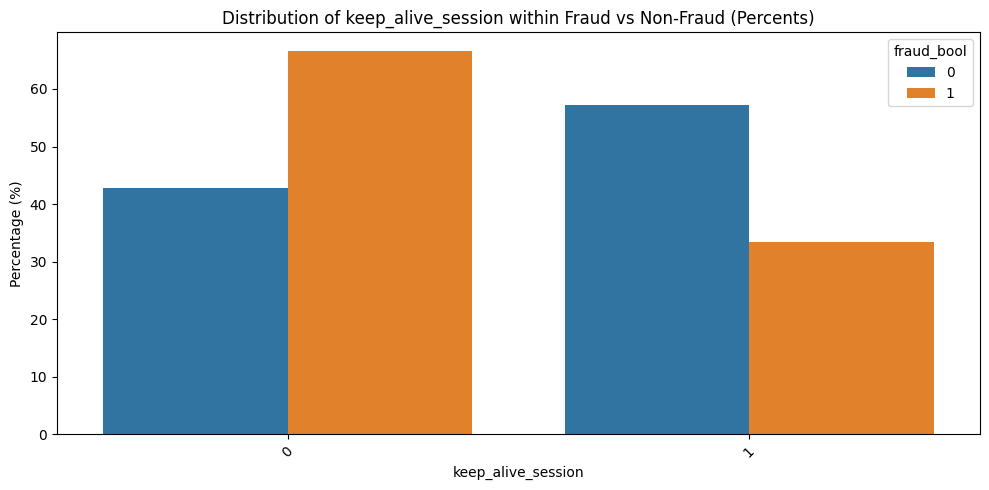

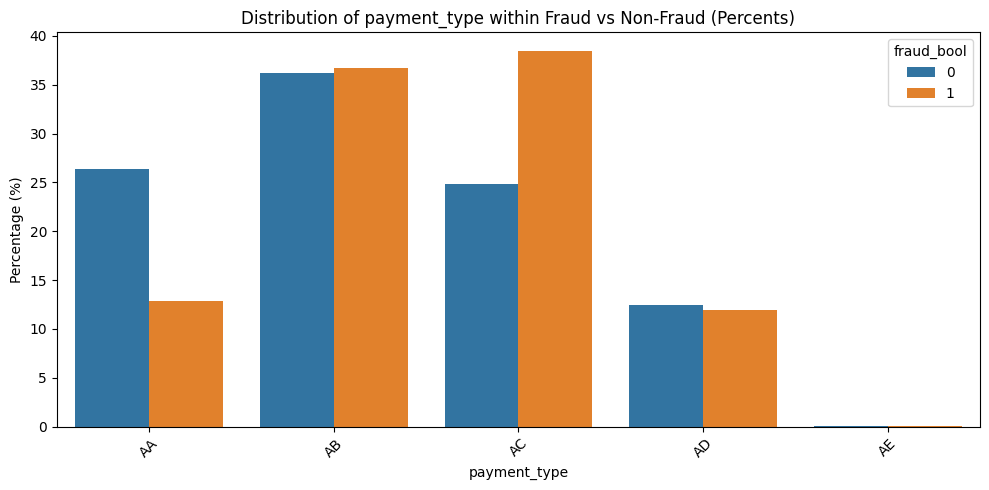

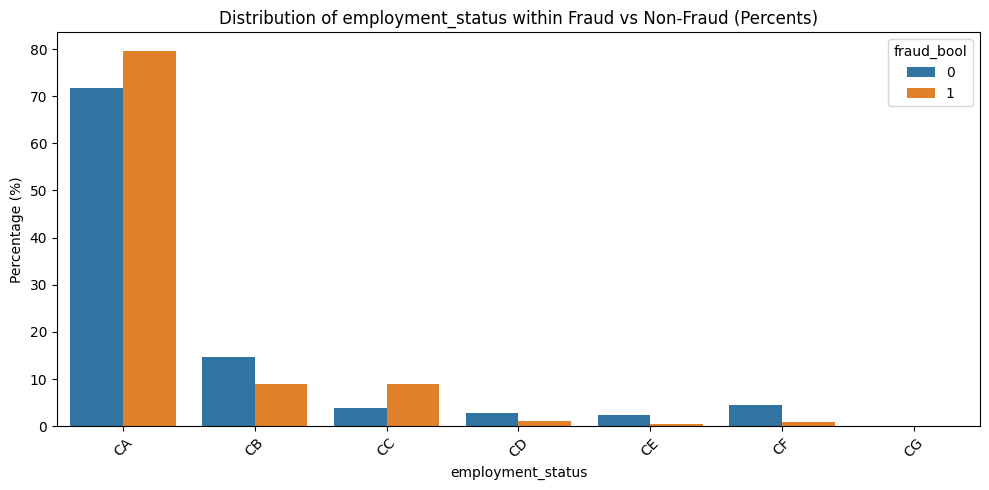

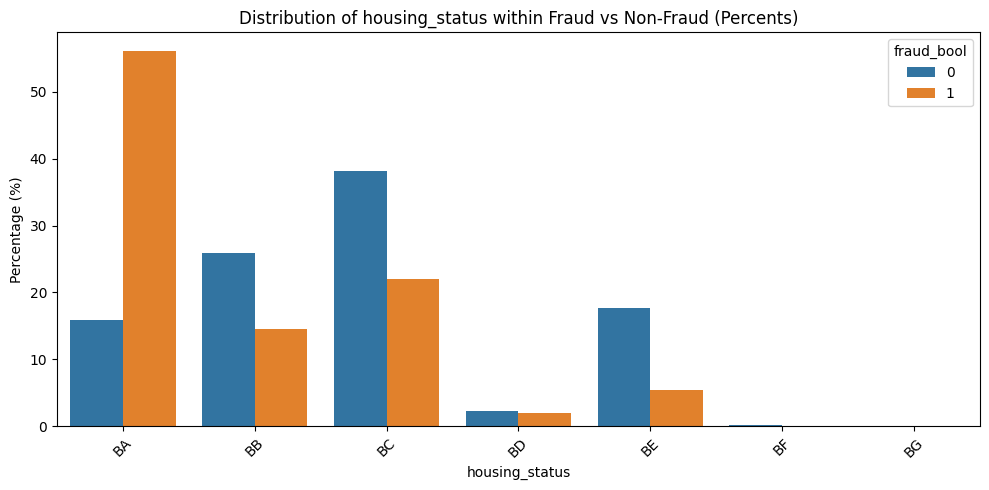

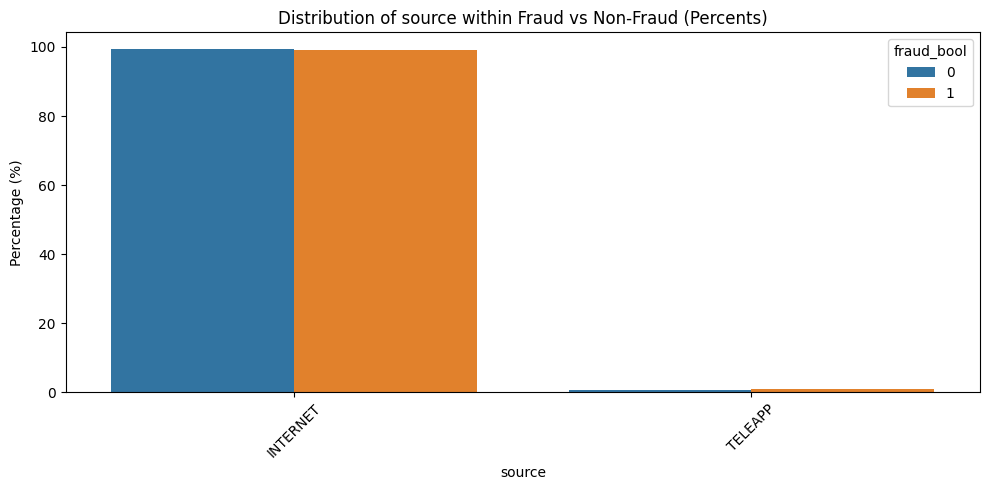

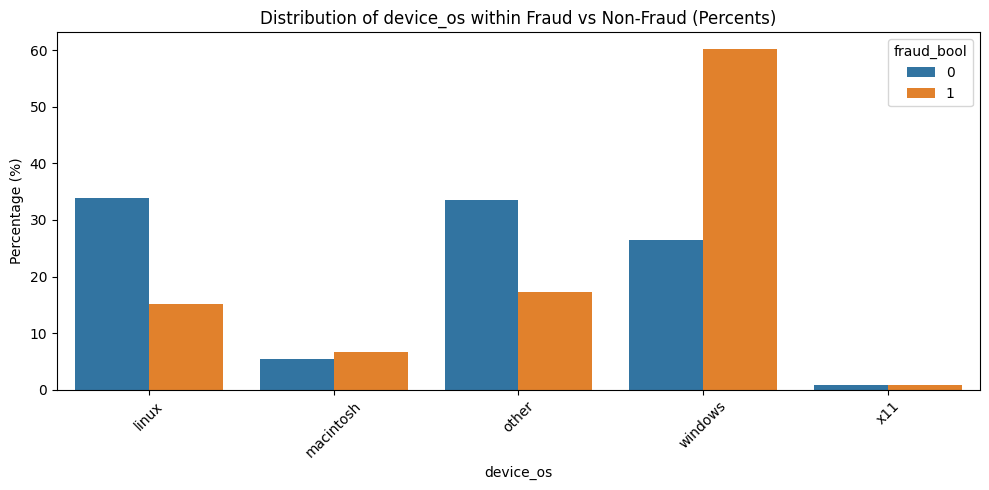

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat_percent_by_target(df, cat_col, target='fraud_bool'):
    # Count category distribution within fraud and non-fraud
    data = (
        df.groupby([target, cat_col]).size().reset_index(name='count')
    )

    # Compute percent WITHIN each target group
    data['percent'] = data['count'] / data.groupby(target)['count'].transform('sum') * 100

    plt.figure(figsize=(10,5))
    sns.barplot(
        data=data,
        x=cat_col,
        y='percent',
        hue=target
    )

    plt.title(f"Distribution of {cat_col} within Fraud vs Non-Fraud (Percents)")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
for col in cat:
    plot_cat_percent_by_target(df, col)


In [49]:
from scipy.stats import chi2_contingency

useful_cats = []
for col in cat:
    contingency = pd.crosstab(df_clean[col], df_clean['fraud_bool'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.5f}")
    if p < 0.05:
        useful_cats.append(col)

print("\nStatistically significant categorical variables:", useful_cats)


email_is_free: p-value = 0.00000
phone_home_valid: p-value = 0.00000
phone_mobile_valid: p-value = 0.00000
has_other_cards: p-value = 0.00000
foreign_request: p-value = 0.00000
keep_alive_session: p-value = 0.00000
payment_type: p-value = 0.00000
employment_status: p-value = 0.00000
housing_status: p-value = 0.00000
source: p-value = 0.00653
device_os: p-value = 0.00000

Statistically significant categorical variables: ['email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [50]:
from scipy.stats import mannwhitneyu

numeric_cols = num

print(f"{'Feature':<30} {'p-value':>10}")
print("-" * 45)

for col in numeric_cols:
    fraud = df_clean[df_clean['fraud_bool'] == 1][col].dropna()
    non_fraud = df_clean[df_clean['fraud_bool'] == 0][col].dropna()
    
    stat, p = mannwhitneyu(fraud, non_fraud, alternative='two-sided')
    print(f"{col:<30} {p:>10.5f}")


Feature                           p-value
---------------------------------------------
income                            0.00000
name_email_similarity             0.00000
current_address_months_count      0.00000
customer_age                      0.00000
velocity_6h                       0.00000
velocity_24h                      0.00000
velocity_4w                       0.00000
date_of_birth_distinct_emails_4w    0.00000
credit_risk_score                 0.00000
proposed_credit_limit             0.00000


Now that you know they’re significant, let’s check how strongly they separate the classes (not just statistically significant, but practically useful):

In [51]:
fraud = df_clean[df_clean['fraud_bool'] == 1]
non_fraud = df_clean[df_clean['fraud_bool'] == 0]

for col in numeric_cols:
    diff = fraud[col].mean() - non_fraud[col].mean()
    print(f"{col:<30} Mean Diff: {diff:.3f}")


income                         Mean Diff: 0.125
name_email_similarity          Mean Diff: -0.103
current_address_months_count   Mean Diff: 28.581
customer_age                   Mean Diff: 7.518
velocity_6h                    Mean Diff: -413.235
velocity_24h                   Mean Diff: -92.082
velocity_4w                    Mean Diff: -22.569
date_of_birth_distinct_emails_4w Mean Diff: -2.193
credit_risk_score              Mean Diff: 44.994
proposed_credit_limit          Mean Diff: 321.901


| Feature                              | Mean Diff (Fraud – Non-Fraud) | Interpretation                                                                                                           |
| ------------------------------------ | ----------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **income**                           | +0.125                        | Slightly higher income in fraud cases — small effect, possibly weak predictor.                                           |
| **name_email_similarity**            | **−0.102**                    | Fraudsters tend to have *less similarity* between name & email → strong behavioral signal.                               |
| **current_address_months_count**     | **+28.3**                     | Fraud cases have much *longer* address history — may indicate forged or reused identity info.                            |
| **customer_age**                     | **+7.25**                     | Fraudsters appear slightly older on average — possibly target-specific pattern.                                          |
| **velocity_6h**                      | **−486.75**                   | Huge negative gap — fraudsters perform *fewer legitimate transactions* or have *abnormal bursts*. Very strong indicator. |
| **velocity_24h**                     | **−158.39**                   | Similar trend, supports above — velocity metrics are powerful fraud features.                                            |
| **velocity_4w**                      | **−101.6**                    | Consistent pattern across time windows. High value → reliable fraud signal.                                              |
| **date_of_birth_distinct_emails_4w** | **−2.083**                    | Fraudsters share DOBs across *fewer distinct emails* → maybe reused fake identities.                                     |
| **credit_risk_score**                | **+45.714**                   | Strongly higher credit risk in fraud cases → high predictive power.                                                      |
| **proposed_credit_limit**            | **+321.684**                  | Fraudsters request much higher limits → extremely strong indicator.                                                      |


COOL ig we have all the reliable variables now..lets see what to do with missing values 

<Axes: xlabel='credit_risk_score', ylabel='Density'>

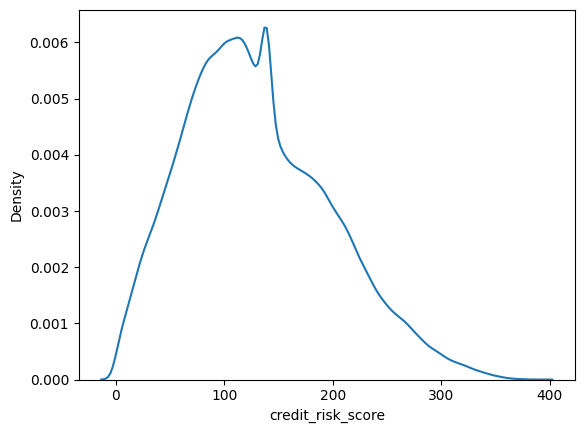

In [52]:
sns.kdeplot(df_clean['credit_risk_score'])

In [53]:
df_with_features = df_clean[num+cat]

In [54]:
df_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794989 entries, 0 to 794988
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   income                            794989 non-null  float64
 1   name_email_similarity             794989 non-null  float64
 2   current_address_months_count      791962 non-null  float64
 3   customer_age                      794989 non-null  int64  
 4   velocity_6h                       794989 non-null  float64
 5   velocity_24h                      794989 non-null  float64
 6   velocity_4w                       794989 non-null  float64
 7   date_of_birth_distinct_emails_4w  794989 non-null  int64  
 8   credit_risk_score                 794989 non-null  float64
 9   proposed_credit_limit             794989 non-null  float64
 10  email_is_free                     794989 non-null  int64  
 11  phone_home_valid                  794989 non-null  int64 

In [55]:
df_clean['credit_risk_score'].quantile(0.6)

np.float64(139.0)

since we can see credit risk score have some null values and it is one of the feature that we cant ignore so lets replace it with something

In [56]:
df_clean['credit_risk_score'] = df_clean['credit_risk_score'].fillna(df_clean['credit_risk_score'].quantile(0.6))

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794989 entries, 0 to 794988
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        794989 non-null  int64  
 1   income                            794989 non-null  float64
 2   name_email_similarity             794989 non-null  float64
 3   current_address_months_count      791962 non-null  float64
 4   customer_age                      794989 non-null  int64  
 5   days_since_request                794989 non-null  float64
 6   payment_type                      794989 non-null  object 
 7   zip_count_4w                      794989 non-null  int64  
 8   velocity_6h                       794989 non-null  float64
 9   velocity_24h                      794989 non-null  float64
 10  velocity_4w                       794989 non-null  float64
 11  bank_branch_count_8w              794989 non-null  int64 

In [77]:
df_with_features = df_clean[num+cat]

In [58]:
df_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794989 entries, 0 to 794988
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   income                            794989 non-null  float64
 1   name_email_similarity             794989 non-null  float64
 2   current_address_months_count      791962 non-null  float64
 3   customer_age                      794989 non-null  int64  
 4   velocity_6h                       794989 non-null  float64
 5   velocity_24h                      794989 non-null  float64
 6   velocity_4w                       794989 non-null  float64
 7   date_of_birth_distinct_emails_4w  794989 non-null  int64  
 8   credit_risk_score                 794989 non-null  float64
 9   proposed_credit_limit             794989 non-null  float64
 10  email_is_free                     794989 non-null  int64  
 11  phone_home_valid                  794989 non-null  int64 

and lets just ignore other or we could just replace it with mode anyways we have too much cat, so lets just ignore it first

In [ ]:
# cat.remove('current_address_months_count')
# s_months_count')

In [65]:

df_with_features.drop('current_address_months_count',axis=1,inplace=True)

In [66]:
df_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794989 entries, 0 to 794988
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   income                            794989 non-null  float64
 1   name_email_similarity             794989 non-null  float64
 2   customer_age                      794989 non-null  int64  
 3   velocity_6h                       794989 non-null  float64
 4   velocity_24h                      794989 non-null  float64
 5   velocity_4w                       794989 non-null  float64
 6   date_of_birth_distinct_emails_4w  794989 non-null  int64  
 7   credit_risk_score                 794989 non-null  float64
 8   proposed_credit_limit             794989 non-null  float64
 9   email_is_free                     794989 non-null  int64  
 10  phone_home_valid                  794989 non-null  int64  
 11  phone_mobile_valid                794989 non-null  int64 

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(),num),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat)
    ]
)

In [68]:
from imblearn.over_sampling import SMOTE



In [69]:
# pip install xgboost

In [82]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline


In [113]:
X_train = df_with_features[num+cat]
y_train = df_clean['fraud_bool']

In [114]:
model = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
    eval_metric='auc',
    random_state=42
))
])


In [115]:

model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [116]:
df = og_df[og_df['month']>5]
df[num+cat].info()

<class 'pandas.core.frame.DataFrame'>
Index: 205011 entries, 794989 to 999999
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   income                            205011 non-null  float64
 1   name_email_similarity             205011 non-null  float64
 2   customer_age                      205011 non-null  int64  
 3   velocity_6h                       205011 non-null  float64
 4   velocity_24h                      205011 non-null  float64
 5   velocity_4w                       205011 non-null  float64
 6   date_of_birth_distinct_emails_4w  205011 non-null  int64  
 7   credit_risk_score                 205011 non-null  int64  
 8   proposed_credit_limit             205011 non-null  float64
 9   email_is_free                     205011 non-null  int64  
 10  phone_home_valid                  205011 non-null  int64  
 11  phone_mobile_valid                205011 non-null  i

In [120]:
from sklearn.metrics import classification_report, roc_auc_score

X_test = df[num+cat]
y_test = df['fraud_bool']
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]



              precision    recall  f1-score   support

           0       0.99      0.85      0.91    202133
           1       0.06      0.69      0.11      2878

    accuracy                           0.84    205011
   macro avg       0.53      0.77      0.51    205011
weighted avg       0.98      0.84      0.90    205011

ROC-AUC: 0.8481228758528653


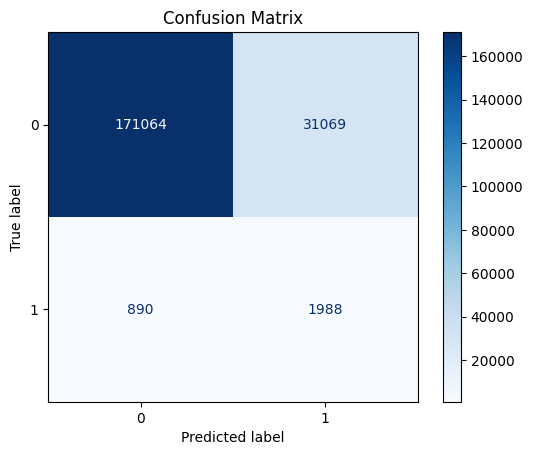

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred1 = [1 if y_p >= 0.7 else 0 for y_p in y_proba ]
print(classification_report(y_test, y_pred1))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
cm = confusion_matrix(y_test, y_pred1)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.74      0.85    202133
           1       0.04      0.80      0.08      2878

    accuracy                           0.74    205011
   macro avg       0.52      0.77      0.47    205011
weighted avg       0.98      0.74      0.84    205011

ROC-AUC: 0.8481228758528653


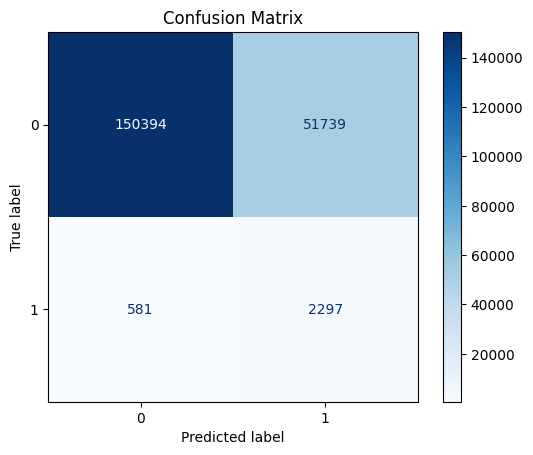

In [124]:
y_pred1 = [1 if y_p >= 0.5 else 0 for y_p in y_proba ]
print(classification_report(y_test, y_pred1))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
cm = confusion_matrix(y_test, y_pred1)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### Anomaly det